In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
#https://www.federalreserve.gov/econres/scf_2009p.htm#EXCELDATEX for 2007-09 panel data

In [203]:
df=pd.read_excel('SCFP2009panel.xlsx')

In [204]:
df.tail(7)

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,FAMSTRUCT07,RACECL,H_RACECL,RACE,H_RACE,OCCAT107,OCCAT207,INDCAT07,HHEALTH07,SPHEALTH07,INCOME07,WAGEINC07,BUSSEFARMINC07,INTDIVINC07,KGINC07,SSRETINC07,TRANSFOTHINC07,PENACCTWD07,NORMINC07,RISK07,PSAVING07,WSAVED07,SAVED07,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR07,LATE6007,USPELL07,AGEFT07,AGEALL07,POSTRWORK07,RFULL07,BSHOPNONE07,BSHOPGRDL07,BSHOPMODR07,ISHOPNONE07,ISHOPGRDL07,ISHOPMODR07,BCALL07,BMAGZNEWS07,BMAILADTV07,BINTERNET07,BFRIENDWORK07,BFINPRO07,BSELF07,BDONT07,BOTHER07,ICALL07,IMAGZNEWS07,IMAILADTV07,IINTERNET07,IFRIENDWORK07,IFINPRO07,ISELF07,IDONT07,IOTHER07,BFINPLAN07,IFINPLAN07,APPLIED07,DENIED07,FULLAMT07,FEARED07,CHECKING07,HCHECK07,NOCHK07,MSAVING07,HSAVING07,HMMA07,CALL07,HCALL07,LIQ07,HLIQ07,CDS07,HCDS07,NMMF07,HNMMF07,STOCKS07,HSTOCKS07,NSTOCKS07,WILSH07,BOND07,HBOND07,IRAKH07,THRIFT07,PENEQ07,RETQLIQ07,HRETQLIQ07,ANYPEN07,DBPLANCJ07,DBPLANT07,DCPLANCJ07,BPLANCJ07,SAVBND07,HSAVBND07,CASHLI07,HCASHLI07,ANNUIT07,TRUSTS07,OTHMA07,HOTHMA07,OTHFIN07,HOTHFIN07,EQUITY07,HEQUITY07,DEQ07,RETEQ07,EQUITINC07,HBROK07,HTRAD07,NTRAD07,FIN07,HFIN07,VEHIC07,HVEHIC07,BUSVEH07,NBUSVEH07,OWN07,NOWN07,VOWN07,LEASE07,NLEASE07,NVEHIC07,HOUSES07,HHOUSES07,HOUSECL07,ORESRE07,HORESRE07,NNRESRE07,HNNRESRE07,BUS07,ACTBUS07,NONACTBUS07,HBUS07,HABUS07,OTHNFIN07,HOTHNFIN07,NFIN07,HNFIN07,NHNFIN07,ASSET07,HASSET07,HELOC07,MRTHEL07,NHMORT07,HOMEEQ07,HMRTHEL07,HHELOC07,HNHMORT07,HPRIMMORT07,PURCH107,REFINEVER07,FGUARANTEE07,FHA07,HSECMORT07,HELOCYN07,ADJM107,ADJM207,ONTIMEM107,ONTIMEM207,OTHLOC07,HOTHLOC07,RESDBT07,HRESDBT07,CCBAL07,HCCBAL07,VEHINST07,EDNINST07,INSTALL07,OTHINST07,HVEHINST07,HEDNINST07,HOTHINST07,HINSTALL07,ODEBT07,HODEBT07,DEBT07,HDEBT07,NETWORTH07,TPAY07,MORTPAY07,CONSPAY07,REVPAY07,PIRTOTAL07,PIRMORT07,PIRCONS07,PIRREV07,INCCL207,NWCAT07,INCCAT07,ASSETCAT07,HIPIR07,LEVERAGE07,AGE09,AGECL09,EDUC09,EDCL09,MARRIED09,KIDS09,LIFECL09,FAMSTRUCT09,OCCAT109,OCCAT209,INDCAT09,HHEALTH09,SPHEALTH09,INCOME09,WAGEINC09,BUSSEFARMINC09,INTDIVINC09,KGINC09,SSRETINC09,TRANSFOTHINC09,PENACCTWD09,NORMINC09,RISK09,PSAVING09,WSAVED09,SAVED09,SPENDMOR09,LATE6009,USPELL09,AGEFT09,AGEALL09,POSTRWORK09,RFULL09,BSHOPNONE09,BSHOPGRDL09,BSHOPMODR09,ISHOPNONE09,ISHOPGRDL09,ISHOPMODR09,BCALL09,BMAGZNEWS09,BMAILADTV09,BINTERNET09,BFRIENDWORK09,BFINPRO09,BSELF09,BDONT09,BOTHER09,ICALL09,IMAGZNEWS09,IMAILADTV09,IINTERNET09,IFRIENDWORK09,IFINPRO09,ISELF09,IDONT09,IOTHER09,BFINPLAN09,IFINPLAN09,APPLIED09,DENIED09,FULLAMT09,FEARED09,CHECKING09,HCHECK09,NOCHK09,MSAVING09,HSAVING09,HMMA09,CALL09,HCALL09,LIQ09,HLIQ09,CDS09,HCDS09,NMMF09,HNMMF09,STOCKS09,HSTOCKS09,NSTOCKS09,WILSH,BOND09,HBOND09,IRAKH09,THRIFT09,PENEQ09,RETQLIQ09,HRETQLIQ09,ANYPEN09,DBPLANCJ09,DBPLANT09,DCPLANCJ09,BPLANCJ09,SAVBND09,HSAVBND09,CASHLI09,HCASHLI09,ANNUIT09,TRUSTS09,OTHMA09,HOTHMA09,OTHFIN09,HOTHFIN09,EQUITY09,HEQUITY09,DEQ09,RETEQ09,EQUITINC09,HBROK09,HTRAD09,NTRAD09,FIN09,HFIN09,VEHIC09,HVEHIC09,BUSVEH09,NBUSVEH09,OWN09,NOWN09,VOWN09,LEASE09,NLEASE09,NVEHIC09,HOUSES09,HHOUSES09,HOUSECL09,ORESRE09,HORESRE09,NNRESRE09,HNNRESRE09,BUS09,ACTBUS09,NONACTBUS09,HBUS09,HABUS09,OTHNFIN09,HOTHNFIN09,NFIN09,HNFIN09,NHNFIN09,ASSET09,HASSET09,HELOC09,MRTHEL09,NHMORT09,HOMEEQ09,HMRTHEL09,HHELOC09,HNHMORT09,HPRIMMORT09,PURCH109,REFINEVER09,FGUARANTEE09,FHA09,HSECMORT09,HELOCYN09,ADJM109,ADJM209,ONTIMEM109,ONTIMEM209,OTHLOC09,HOTHLOC09,RESDBT09,HRESDBT09,CCBAL09,HCCBAL09,VEHINST09,EDNINST09,INSTALL09,OTHINST09,HVEHINST09,HEDNINST09,HOTHINST09,HINSTALL09,ODEBT09,HODEBT09,DEBT09,HDEBT09,NETWORTH09,TPAY09,MORTPAY09,CONSPAY09,REVPAY09,PIRTOTAL09,PIRMORT09,PIRCONS09,PIRREV09,INCCL209,NWCAT09,INCCAT09,ASSETCAT09,HIPIR09,LEVERAGE09,INCOMEDIF,ASSETDIF,NETWORTHDIF,FINDIF,LIQDIF,CDSDIF,NMMFDIF,STOCKSDIF,BONDDIF,RETQLIQDIF,SAVBNDDIF,CASHLIDIF,OTHMADIF,OTHFINDIF,NFINDIF,VEHICDIF,HOUSESDIF,ORESREDIF,NNRESREDIF,BUSDIF,OTHNFINDIF,DEBTDIF,MRTHELDIF,RESDBTDIF,OTHLOCDIF,CCBALDIF,INSTALLDIF,ODEBTDIF,TPAYD

In [205]:
df.shape

(19285, 515)

In [206]:
## Compute the risky assets and risk-free assets for 2007
df['RiskFree07']= df['LIQ07'] + df['CDS07'] + df['SAVBND07']+ df['CASHLI07']
#Risk__ and Risky__ are same columns
df['Risk07'] = df['NMMF07'] + df['STOCKS07'] + df['BOND07']

In [207]:
df['RiskFree09']= df['LIQ09'] + df['CDS09'] + df['SAVBND09']+ df['CASHLI09']
df['Risk09'] = df['NMMF09'] + df['STOCKS09'] + df['BOND09']

In [208]:
# Compute the risk tolerance for 2007 and '09
df['RT07'] = df['Risk07']/(df['Risk07']+df['RiskFree07'])

In [209]:
#Average stock index for normalizing the risky assets in 2009
Average_SP500_2007=1478
Average_SP500_2009=948

In [210]:
# Compute the risk tolerance for 2009
df['RT09'] = df['Risk09']/(df['Risk09']+df['RiskFree09'])*(Average_SP500_2009/Average_SP500_2007)

In [211]:
df['PercentageChange'] = np.abs(df['RT09']/df['RT07']-1)

In [212]:
df.dropna(axis=0,inplace=True)

In [213]:
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [214]:
df.shape

(7956, 522)

C:\Users\91626\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RT07', ylabel='Density'>

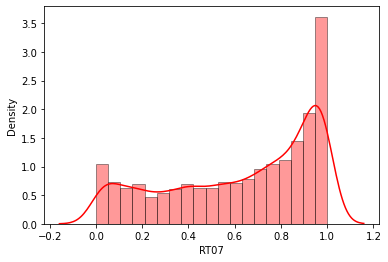

In [215]:
sns.distplot(df['RT07'], hist_kws={'edgecolor':'black'},color='red')

C:\Users\91626\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RT09', ylabel='Density'>

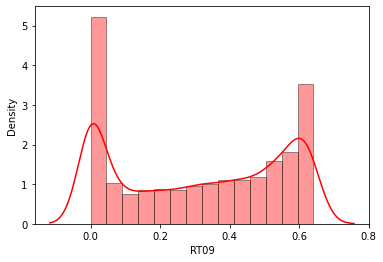

In [216]:
sns.distplot(df['RT09'], hist_kws={'edgecolor':'black'},color='red')

In [217]:
#Intelligent Investors
df2 = df[df['PercentageChange']<=.1]
df2['TrueRiskTolerance'] = (df2['RT07'] + df2['RT09'])/2

C:\Users\91626\AppData\Local\Temp/ipykernel_14008/4150071405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TrueRiskTolerance'] = (df2['RT07'] + df2['RT09'])/2


## Feature Elimination

In [218]:
df2.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
df2.drop(labels=['PercentageChange'], axis=1, inplace=True)

C:\Users\91626\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [219]:
updated_list = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']
drop_list = [col for col in df2.columns if col not in updated_list]
df2.drop(labels=drop_list, axis=1, inplace=True)

In [220]:
#Saving Investors details for further purposes
df2.to_csv('Investor_details.csv',index=False)

<AxesSubplot:>

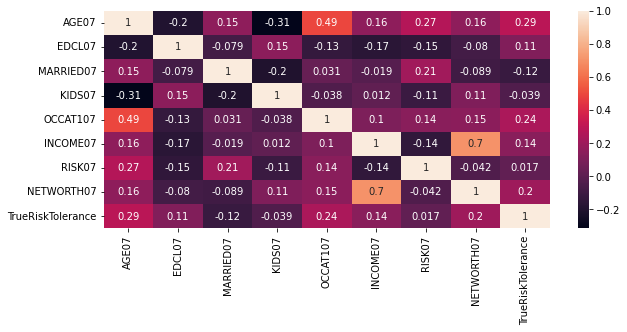

In [221]:
plt.figure(figsize=(10,4))
sns.heatmap(df2.corr(),annot=True)

In [222]:
from sklearn.model_selection import train_test_split
X=df2.drop('TrueRiskTolerance',axis=1)
Y= df2['TrueRiskTolerance']
seed=42
X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=seed)

In [223]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor

In [224]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Ensemble Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [225]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
num_folds=10
for name, model in models:
    kfold = KFold(n_splits=num_folds,shuffle=False)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.087542 (0.694346)
LASSO: 0.268309 (0.860589)
EN: 0.216124 (0.821148)
KNN: -0.381397 (0.187246)
CART: -0.476427 (0.543562)
SVR: -0.133088 (0.103496)
ABR: -0.420703 (0.132534)
GBR: -0.640543 (0.149087)
RFR: -0.697473 (0.115761)
ETR: -0.696052 (0.160930)


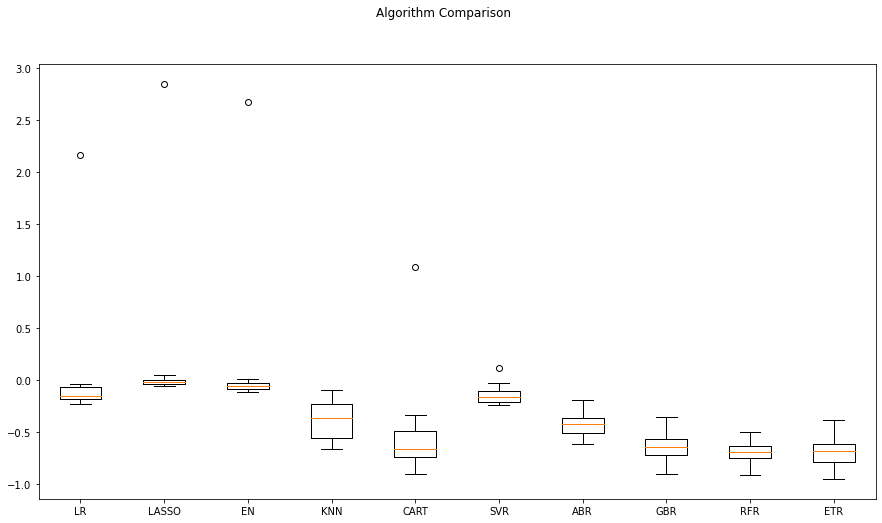

In [226]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()
#RF performs based on less deviation and centric to mean.

In [227]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [25,50,100,150,200,250,300,350,400,450]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=None, shuffle=False)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train, Y_train)

In [229]:
grid_result.best_estimator_

RandomForestRegressor(n_estimators=150)

In [230]:
#Test Data Prediction
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=150)

In [231]:
from sklearn.metrics import r2_score
predictions_train = model.predict(X_train)
print(r2_score(Y_train, predictions_train))

0.9604020065865277


In [233]:
predictions_test = model.predict(X_test)
print(r2_score(Y_test, predictions_test))

0.6281120619525846


In [234]:
#feature importance
print(model.feature_importances_ )


[0.16220034 0.02256908 0.01487935 0.04925044 0.02448537 0.21578048
 0.05224881 0.45858613]


In [237]:
df2.columns

Index(['AGE07', 'EDCL07', 'MARRIED07', 'KIDS07', 'OCCAT107', 'INCOME07',
       'RISK07', 'NETWORTH07', 'TrueRiskTolerance'],
      dtype='object')

<AxesSubplot:>

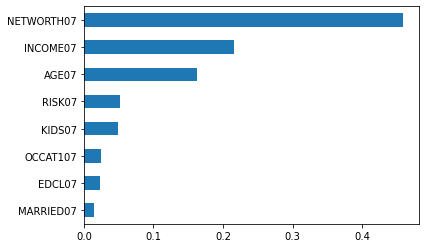

In [245]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
#feat_imp= np.argsort(feat_imp)
feat_imp.nsmallest(10).plot(kind='barh')

In [246]:
#Model Save
from pickle import dump
from pickle import load

In [247]:
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [252]:
from sklearn.metrics import mean_squared_error
loaded_model = load(open(filename, 'rb'))
predictions = loaded_model.predict(X_test)
result = mean_squared_error(Y_test, predictions)
print(r2_score(Y_test, predictions))
print(result)

0.6281120619525846
0.011473356427903616
